In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Iris\Iris_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4
0,5.1,3.5,1.4,0.2
1,NaN,3.0,1.4,NaN
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,NaN,3.0,5.2,NaN
148,6.2,3.4,5.4,2.3


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	28
float64		column 2	0
float64		column 3	0
float64		column 4	28


In [4]:
df.describe()

,column 1,column 2,column 3,column 4
count,122.000000,150.000000,150.000000,122.000000
mean,5.813115,3.054000,3.758667,1.190164
std,0.768271,0.433594,1.764420,0.727660
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.300000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

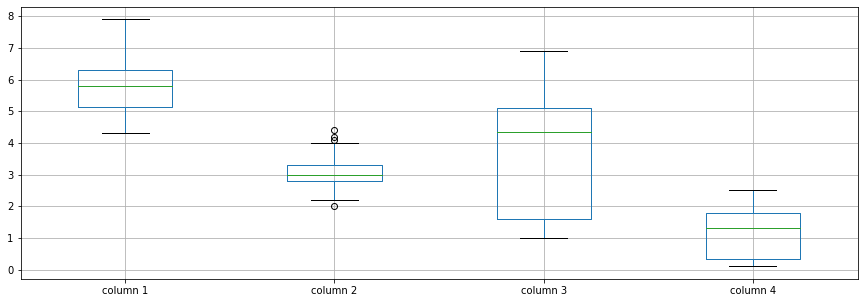

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    5.813115
column 2    3.054000
column 3    3.758667
column 4    1.190164
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4
column 1,1.000000,-0.113893,0.843492,0.778870
column 2,-0.113893,1.000000,-0.420516,-0.382504
column 3,0.843492,-0.420516,1.000000,0.957806
column 4,0.778870,-0.382504,0.957806,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [4,4+55,4+55+55,4+55+55+55,4+55+55+55+55,4+55+55+55,4+55+55,4+55,4], vae_layer = False, seed = 4)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [4]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 13.057961252000597
Epoch: 1 , loss: 12.975003454420301
Epoch: 2 , loss: 13.057417657640245
Epoch: 3 , loss: 13.037747277153862
Epoch: 4 , loss: 13.014171176486546
Epoch: 5 , loss: 13.128515667385525
Epoch: 6 , loss: 13.060054037306044
Epoch: 7 , loss: 13.14289919535319
Epoch: 8 , loss: 13.227815522087944
Epoch: 9 , loss: 13.086700121561686
Epoch: 10 , loss: 13.062821494208443
Epoch: 11 , loss: 13.209825303819445
Epoch: 12 , loss: 13.019287533230251
Epoch: 13 , loss: 13.087385283576118
Epoch: 14 , loss: 13.040875434875488
Epoch: 15 , loss: 13.079535908169216
Epoch: 16 , loss: 13.012227376302084
Epoch: 17 , loss: 13.084847026401096
Epoch: 18 , loss: 13.047694736056858
Epoch: 19 , loss: 13.092334005567762
Epoch: 20 , loss: 12.939481417338053
Epoch: 21 , loss: 13.10144403245714
Epoch: 22 , loss: 13.020262082417807
Epoch: 23 , loss: 13.065333472357857
Epoch: 24 , loss: 13.192870246039497
Epoch: 25 , loss: 13

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(150, 4)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    5.1
column 2    3.7
column 3    1.5
column 4    0.4
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Iris.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4
0,0.000000,0.0,0.0,0.000000
1,-4.885152,0.0,0.0,-0.185166
2,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.000000
4,0.000000,0.0,0.0,0.000000
...,...,...,...,...
145,0.000000,0.0,0.0,0.000000
146,0.000000,0.0,0.0,0.000000
147,-6.484503,0.0,0.0,-1.984520
148,0.000000,0.0,0.0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(33.00107428057459, 97.653468960401)

In [17]:
NRMS=numerator/denominator
NRMS


0.3379406244539731

In [18]:
new_df.iloc[66,:]

column 1    5.6
column 2    3.0
column 3    4.5
column 4    1.5
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4
0,5.100000,3.5,1.4,0.200000
1,0.014848,3.0,1.4,0.014834
2,4.700000,3.2,1.3,0.200000
3,4.600000,3.1,1.5,0.200000
4,5.000000,3.6,1.4,0.200000
...,...,...,...,...
145,6.700000,3.0,5.2,2.300000
146,6.300000,2.5,5.0,1.900000
147,0.015497,3.0,5.2,0.015480
148,6.200000,3.4,5.4,2.300000


In [21]:
imputations[-1].to_excel("Iris_AL_10(imp).xlsx", index=False, header=False)